# 4 Pre-processing & Training Data Development

## Import

In [2]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
import datetime

## Load The Data

In [3]:
cleaned_data = pd.read_csv('data/cleaned_train.csv')

## Create Dummy Variables for Categorical Features

In [5]:
cleaned_data = pd.get_dummies(cleaned_data, columns=['Genes in mother\'s side', 'Inherited from father', 'Maternal gene', 'Paternal gene', 'Gender'], drop_first=True)

## Standardize Numeric Features

In [6]:
scaler = StandardScaler()
numeric_features = ['Patient Age', 'Blood cell count (mcL)', 'White Blood cell count (thousand per microliter)']
cleaned_data[numeric_features] = scaler.fit_transform(cleaned_data[numeric_features])

## Split Dataset into Training and Test Sets

In [7]:
X = cleaned_data.drop(['Genetic Disorder', 'Disorder Subclass'], axis=1) # Assuming you are predicting one of these as the target
y = cleaned_data['Genetic Disorder'] # Or 'Disorder Subclass'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Data Quality Check

In [10]:
print(cleaned_data.isnull().sum())

Patient Id                                             0
Patient Age                                            0
Blood cell count (mcL)                                 0
Patient First Name                                     0
Father's name                                          0
Mother's age                                        6036
Father's age                                        5986
Institute Name                                      5106
Location of Institute                                  0
Status                                                 0
Respiratory Rate (breaths/min)                      2149
Heart Rate (rates/min                               2113
Test 1                                              2127
Test 2                                              2152
Test 3                                              2147
Test 4                                              2140
Test 5                                              2170
Parental consent               

In [11]:
print(cleaned_data.describe())

        Patient Age  Blood cell count (mcL)  Mother's age  Father's age  \
count  2.208300e+04            2.208300e+04  16047.000000  16097.000000   
mean   4.729873e-17           -1.608157e-15     34.526454     41.972852   
std    1.000023e+00            1.000023e+00      9.852598     13.035501   
min   -1.669860e+00           -4.037618e+00     18.000000     20.000000   
25%   -9.517251e-01           -6.799738e-01     26.000000     31.000000   
50%    5.788528e-03            2.642927e-03     35.000000     42.000000   
75%    7.239237e-01            6.759495e-01     43.000000     53.000000   
max    1.681437e+00            3.560873e+00     51.000000     64.000000   

        Test 1   Test 2   Test 3   Test 4   Test 5  No. of previous abortion  \
count  19956.0  19931.0  19936.0  19943.0  19913.0              19921.000000   
mean       0.0      0.0      0.0      1.0      0.0                  2.003062   
std        0.0      0.0      0.0      0.0      0.0                  1.411919   
min 

## Feature Selection Confirmation

/var/folders/xv/zbhf3_h53h508qrw49g2ty1h0000gn/T/ipykernel_14665/4274462790.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(cleaned_data.corr(), annot=True, cmap='coolwarm')


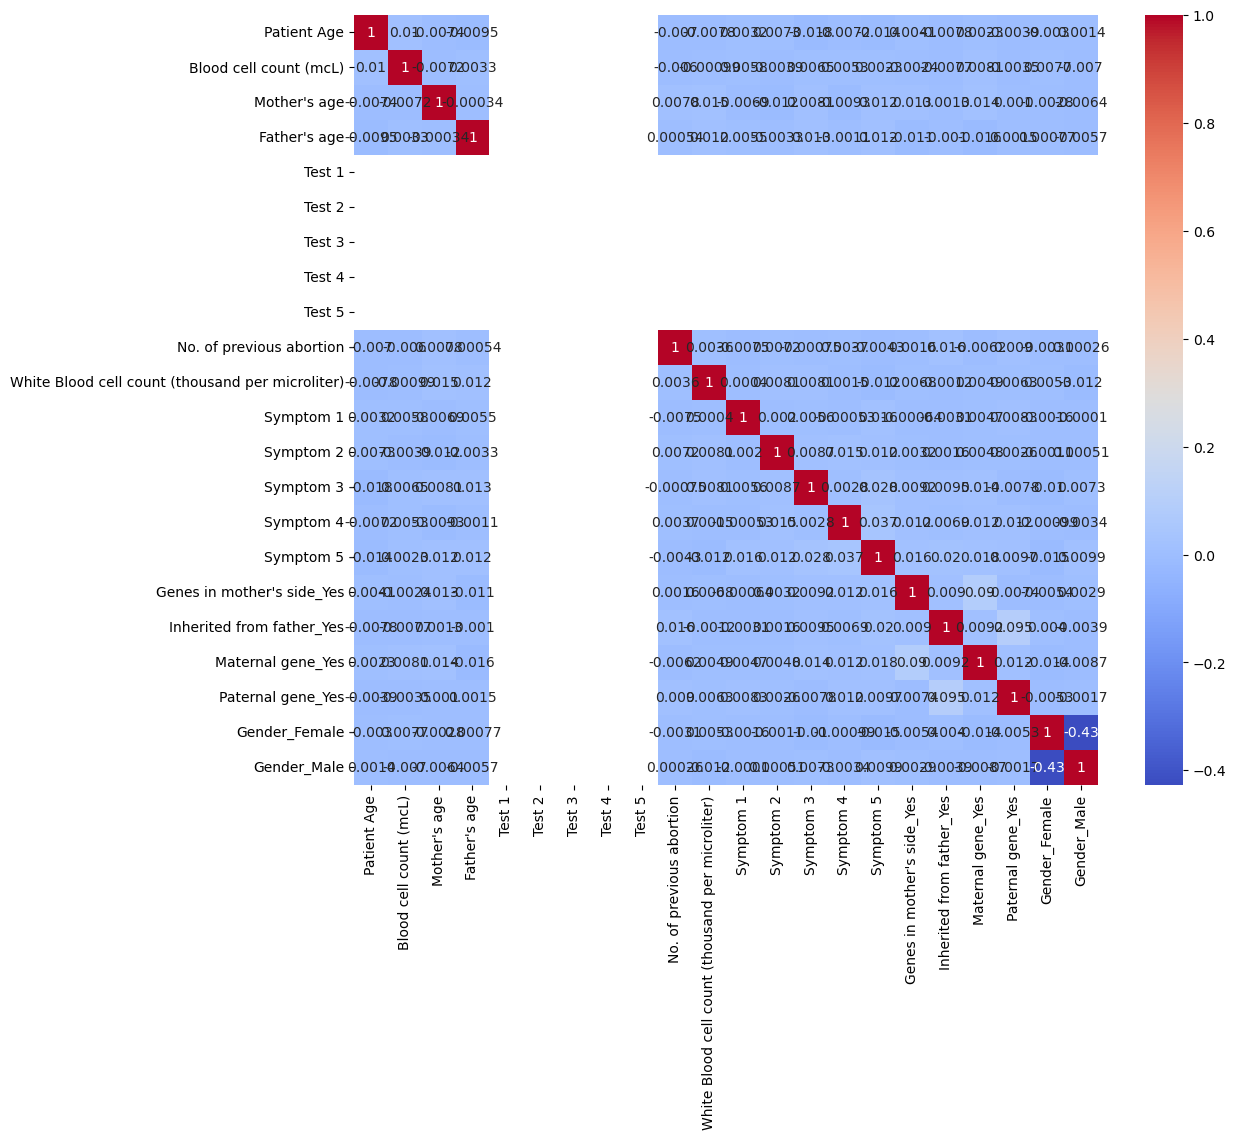

In [12]:
plt.figure(figsize=(12, 10))
sns.heatmap(cleaned_data.corr(), annot=True, cmap='coolwarm')
plt.show()

## Data Split Validation

In [16]:
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

Mitochondrial genetic inheritance disorders     0.510507
Single-gene inheritance diseases                0.386739
Multifactorial genetic inheritance disorders    0.102754
Name: Genetic Disorder, dtype: float64
Mitochondrial genetic inheritance disorders     0.516517
Single-gene inheritance diseases                0.375125
Multifactorial genetic inheritance disorders    0.108358
Name: Genetic Disorder, dtype: float64


/var/folders/xv/zbhf3_h53h508qrw49g2ty1h0000gn/T/ipykernel_14665/3417804764.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Patient Age'], label='Train')
/var/folders/xv/zbhf3_h53h508qrw49g2ty1h0000gn/T/ipykernel_14665/3417804764.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X

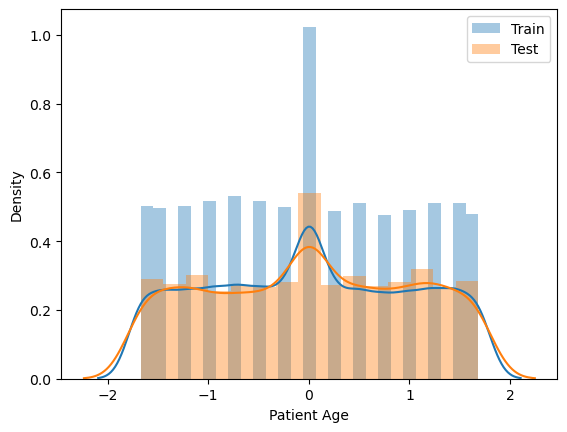

In [17]:
sns.distplot(X_train['Patient Age'], label='Train')
sns.distplot(X_test['Patient Age'], label='Test')
plt.legend()
plt.show()